<a href="https://colab.research.google.com/github/RubenMcCarty/Data-Analysis-Python/blob/main/Ingesta_%26_An%C3%A1lisis_USIL_Ruben_Quispe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Ingesta de Datos y Análisis de Datos (IABSA)**
## [RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)
The International Association for Big Size Acceptance (IABSA), es una organización mundial sin fines de lucro
 organización comprometida a comprender y mejorar la calidad de vida de las personas con tallas grandes.

 Una de sus sucursales se enfoca en ropa de mujer e incluye una constante revisión del mercado para
 garantizar que una mujer de talla grande tenga las mismas oportunidades para encontrar los artículos que le gustan del mismo manera que una mujer con tamaño mediano puede.
 Debemos organizar los datos que han recopilado de proveedores comunes de ropa femenina.
 ropa interior y proporcionar un análisis para revisar la política inclusiva (o no inclusiva) de la
 proveedores para que puedan asesorar a los miembros de la comunidad y generar políticas correctivas o
 incluso aplicar sanciones en los casos que corresponda.
 La advertencia se activa cuando el stock disponible para artículos extragrandes es inferior al 50 % del stock
 ofrecido para artículos extra grandes pero más del 30%. Las sanciones se producen cuando el stock disponible para artículos extragrandes es inferior al 30% del stock ofertado para artículos extragrandes.

El conjunto de datos, son varios archivos ".csv". Cada archivo presenta los productos de ropa interior presentados por un proveedor determinado. Un vendedor puede distribuir productos de varias marcas.

Suposiciones:
1. El tipo de ropa interior podrá identificarse por la estructura de la talla:
tamaños
Se consideran sujetadores:
CONOCIMIENTO DE LOS NEGOCIOS
  - [1X, 2X, 3X,...] se consideran sujetadores. Incluyen cuerpo, vestidos y artículos relacionados con el pecho para grandes
  - [34A, 36B, 40D, 36A/B, 36G(4D),...] se consideran sujetadores. Estos son los tamaños más comunes.
 estructuras para sujetadores en las que el número describe el tamaño debajo del busto y la letra está relacionada con
 el tamaño del busto.
 Los siguientes NO se consideran sujetadores:
 - [S, M, L, XL, XXL,...] no son sujetadores. Estas tallas están relacionadas con bikinis, braguitas o tops.
 - [6,7,8,9,...] no son sujetadores. Están relacionados con boypants, calzoncillos, tangas, bragas y otros debajo-
 artículos de ombligo
  - [A,B,C,D,...] no se consideran sujetadores. Estos tamaños están relacionados con los sujetadores adhesivos de silicona.

2. Según la talla, los sujetadores se clasifican en 4 grupos de tallas:
 - “Pequeño” = Tallas bajo busto en el grupo: [30,32]
 - “Medium” = Tallas bajo busto en el grupo: [34,36]
 - “Large” = Tallas bajo busto en el grupo: [38,40]
 - “Extra Large” = Tallas bajo pecho del grupo: [42,44,46] y tallas con estructura [1X, 2X,
3 veces,...]

3. La IABSA considera “tamaño grande” al grupo de tamaño “Extra Grande”.

4. Un producto único se define por la combinación única de nombre de producto, MRP, URL, color,
 tamaño total y el tamaño disponible con la mayor combinación de tamaños.

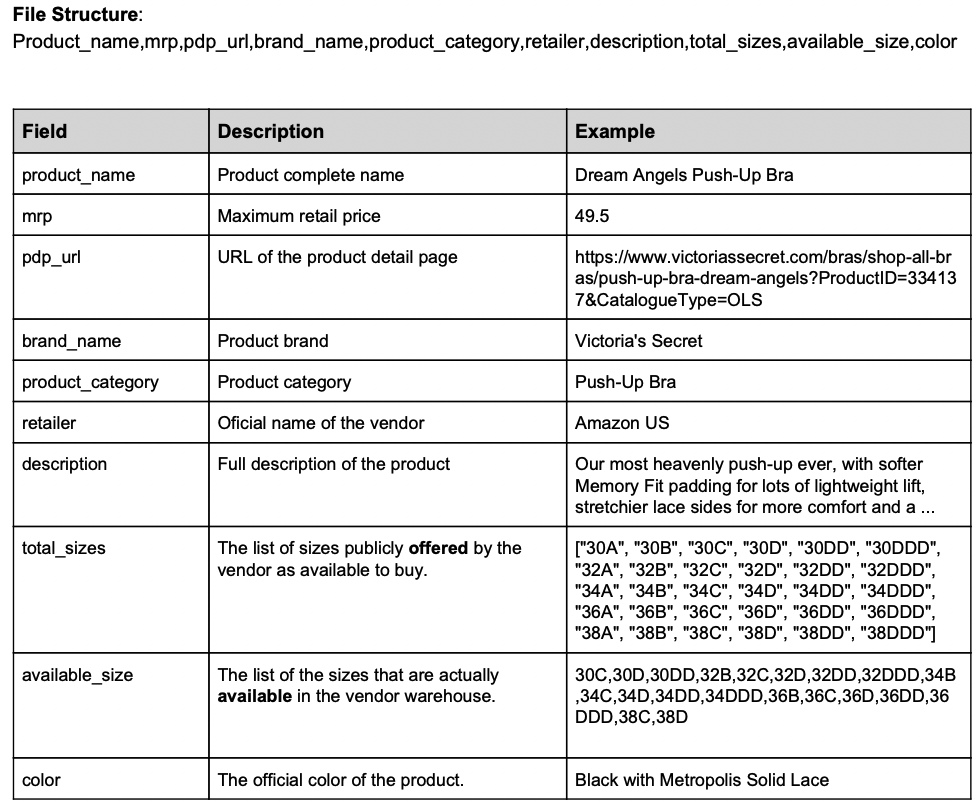

# 1. IMPORTANDO LAS LIBRERIAS NECESARIAS

In [77]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
# to normalize the strings
import unicodedata
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)

pals = sns.hls_palette(8, l=.3, s=.8)
purple = sns.cubehelix_palette(11)
light_purple = sns.light_palette("purple",n_colors=8)
pink = sns.color_palette("husl", 8)[7]
sns.set_palette(pals)
fig_size=[12,9]
sns.set(font_scale = 1.4)
sns.set_style('white', {'legend.frameon':True})
#sns.set_style("white")
plt.rcParams["figure.figsize"] = fig_size

# CARGANDO LOS DATASET Y HACER LAS TRANSFORMACIONES NECESARIAS PARA LA LIMPIEZA DE DATOS

# Data set ae_com.csv vendedor1

In [5]:
df1 = pd.read_csv('ae_com.csv')
df1

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL",True Black
3,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL",White
4,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL",Royal Navy
...,...,...,...,...,...,...,...,...,...,...
28323,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M, L",Deep Burgundy
28324,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M",Fresh Bright
28325,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M",Slab Gray
28326,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M, L, XL",Softest Jade


Pra ver la información de dataset, usamos info, como vemos hay datos nulos de la columna 8 ya que solo hay 28327 en lugar de 28328 filas.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28328 entries, 0 to 28327
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      28328 non-null  object 
 1   mrp               28328 non-null  float64
 2   pdp_url           28328 non-null  object 
 3   brand_name        28328 non-null  object 
 4   product_category  28328 non-null  object 
 5   retailer          28328 non-null  object 
 6   description       28328 non-null  object 
 7   total_sizes       28328 non-null  object 
 8   available_size    28327 non-null  object 
 9   color             28328 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.2+ MB


# Evaluación de datos faltantes
Los valores faltantes se convierten a los predeterminados. Usamos las siguientes funciones para identificar estos valores faltantes. Hay dos métodos para detectar datos faltantes:

* isnull()
* notnull()

In [7]:
missing_data = df1.isnull()
missing_data

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
28323,False,False,False,False,False,False,False,False,False,False
28324,False,False,False,False,False,False,False,False,False,False
28325,False,False,False,False,False,False,False,False,False,False
28326,False,False,False,False,False,False,False,False,False,False


In [8]:
df1.replace('?', np.nan, inplace=True)
df1.replace('', np.nan, inplace=True)

"TRUE" significa valor perdido, mientras que "FALSE" significa valor no perdido.

# Contamos los valores perdidos en cada columna
Usando un bucle for en Python, podemos calcular rápidamente el número de valores faltantes en cada columna. Como se mencionó anteriormente, "TRUE" representa un valor perdido, "FALSE" significa que el valor está presente en el conjunto de datos. En el cuerpo del bucle for, el método ".value_counts ()" cuenta el número de valores "TRUE".

In [9]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('__________________________________________')

product_name
False    28328
Name: product_name, dtype: int64
__________________________________________
mrp
False    28328
Name: mrp, dtype: int64
__________________________________________
pdp_url
False    28328
Name: pdp_url, dtype: int64
__________________________________________
brand_name
False    28328
Name: brand_name, dtype: int64
__________________________________________
product_category
False    28328
Name: product_category, dtype: int64
__________________________________________
retailer
False    28328
Name: retailer, dtype: int64
__________________________________________
description
False    28328
Name: description, dtype: int64
__________________________________________
total_sizes
False    28328
Name: total_sizes, dtype: int64
__________________________________________
available_size
False    28327
True         1
Name: available_size, dtype: int64
__________________________________________
color
False    28328
Name: color, dtype: int64
__________________________________


# Según el resumen anterior, cada columna tiene 28328 filas de datos, 1 columnas que contienen datos faltantes:

1. "available_size": 1 missing data

como vemos la comlumna available_size vemos que hay un valor perdido por eso es True =1

# Hacer frente o resolver los datos faltantes
* ¿Cómo lidiar con los datos faltantes?
#1. Eliminar (dropear) datos
  * a. Dropear toda la fila
  * b. Dropear toda la columna
#2. reemplazar datos
  * a. reemplazarlo por la media
  * b. reemplazarlo por frecuencia
  * c. reemplazarlo en función de otras funciones

Las columnas enteras deben descartarse solo si la mayoría de las entradas de la columna están vacías. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarse por completo. Tenemos cierta libertad para elegir qué método reemplazar los datos; sin embargo, algunos métodos pueden parecer más razonables que otros. Aplicaremos cada método a muchas columnas diferentes:

In [10]:
df1[['available_size']]

,available_size
0,"XS, S, M, L, XL, XXL"
1,"XS, S, M, L, XL, XXL"
2,"XS, S, M, L, XL, XXL"
3,"XS, S, M, L, XL, XXL"
4,"XS, S, M, L, XL, XXL"
...,...
28323,"XS, S, M, L"
28324,"XS, S, M"
28325,"XS, S, M"
28326,"XS, S, M, L, XL"


In [11]:
missing_data[['available_size']]

,available_size
0,False
1,False
2,False
3,False
4,False
...,...
28323,False
28324,False
28325,False
28326,False


necesitamos saber que fila es valor True


In [12]:
valor_perdido= df1[df1['available_size']=='True']
valor_perdido

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color


Es una final sin valor es un valor nulo

In [13]:
valor_perdido.shape

(0, 10)

In [14]:
frec1_1 = pd.value_counts(df1['available_size'])
frec1_1

XS, S, M, L, XL, XXL                                                                                   9355
XS, S, M, L, XL                                                                                        6320
XS, S, M, L                                                                                            1341
32A, 32B, 32C, 34A, 34B, 34C, 34D, 36B, 36C, 36D                                                        827
XS, S, M                                                                                                527
                                                                                                       ... 
32B, 32DDD, 34C, 34D, 34DD, 36D                                                                           1
30B, 30C, 34C, 36DD                                                                                       1
30A, 30B, 30C, 30D, 32AA, 32C, 32D, 32DD, 34AA, 34A, 34D, 34DD, 36A, 36D, 36DD, 38B, 38C, 38D, 38DD       1
30A, 30B, 30C, 30D, 32AA, 32

Vemos hay una fila con valor nulo lo cual reemplazamos por el valor mas frecuente 'XS, S, M, L, XL, XXL' como se ve en la tabla anterior

In [15]:
df1["available_size"]= df1["available_size"].str.replace(r"", "XS, S, M, L, XL, XXL ")
df1

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",True Black
3,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",White
4,Aerie Everyday Loves Lace Cheeky,12.50,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Royal Navy
...,...,...,...,...,...,...,...,...,...,...
28323,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Deep Burgundy
28324,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Fresh Bright
28325,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Slab Gray
28326,Aerie Hi-Neck Lace Trim Bralette,34.95,https://www.ae.com/aerie-hi-neck-lace-trim-bra...,AERIE,Bralettes,Ae US,¡Amor! New bralettes. Get bralette happy. This...,"XS, S, M, L, XL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Softest Jade


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28328 entries, 0 to 28327
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      28328 non-null  object 
 1   mrp               28328 non-null  float64
 2   pdp_url           28328 non-null  object 
 3   brand_name        28328 non-null  object 
 4   product_category  28328 non-null  object 
 5   retailer          28328 non-null  object 
 6   description       28328 non-null  object 
 7   total_sizes       28328 non-null  object 
 8   available_size    28327 non-null  object 
 9   color             28328 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.2+ MB


In [17]:
frec1 = pd.value_counts(df1['mrp'])
frec1

9.50     6819
12.50    5795
26.95    3327
29.95    3277
34.95    1755
39.95    1699
49.95    1407
44.95    1044
24.95     951
14.50     894
22.95     389
32.95     352
7.50      256
36.95     118
72.99      56
38.50      46
36.50      46
66.99      35
11.50      24
15.50      23
69.99      15
Name: mrp, dtype: int64

In [18]:
frec_retailer = pd.value_counts(df1['retailer'])
frec_retailer

Ae US    28328
Name: retailer, dtype: int64

In [19]:
df1.describe()

,mrp
count,28328.000000
mean,22.822207
std,13.026553
min,7.500000
25%,11.500000
50%,22.950000
75%,29.950000
max,72.990000


# Leer dataset de amazon_com.csv

In [20]:
df2 = pd.read_csv('amazon_com.csv')
df2

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,$36.00,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,$27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,"Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,$65.00,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,"32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black
3,Hanky Panky Womens Signature Lace Retro V-Kini,$36.00,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,"Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
4,Wacoal Women's Red Carpet Strapless Bra,$65.00,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
...,...,...,...,...,...,...,...,...,...,...
31607,Wacoal Women's Red Carpet Strapless Bra,$65.00,https://www.amazon.com/-/dp/B01CEBGODE?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
31608,Wacoal Women's Underwire Sport Bra,$65.00,https://www.amazon.com/-/dp/B01GTNW0TA?th=1&psc=1,Wacoal,Bras,Amazon US,"Sport bra offers great control, support and co...","32C , 32D , 32DD , 32DDD , 32G , 32H , 34C , 3...","32C , 32D , 32DD , 32G , 32H , 34C , 34D , 34D...",Teaberry/Gray
31609,Wacoal Women's Retro Chic Underwire Bra,$60.00,https://www.amazon.com/-/dp/B01N6KT7XE?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful low plunge chantilly lace bra with s...,"30B , 30D , 32B , 32C , 32D , 32DD , 32DDD , 3...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...",Violet Tulip
31610,Wacoal Women's Halo Underwire Bra,$48.00,https://www.amazon.com/-/dp/B00SJ6UBTC?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful all over cross-dye soft lace cups an...,"32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...","32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...",Ivory


Vemos que la columna mrp Maximum retail price esta en dolares, lo cual debemos transformarlos en este caso quitarlos con el comando de python replace.

In [21]:
df2["mrp"]= df2["mrp"].str.replace(r"$", "")
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,36.00,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,"Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,65.00,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,"32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black
3,Hanky Panky Womens Signature Lace Retro V-Kini,36.00,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,"Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
4,Wacoal Women's Red Carpet Strapless Bra,65.00,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
...,...,...,...,...,...,...,...,...,...,...
31607,Wacoal Women's Red Carpet Strapless Bra,65.00,https://www.amazon.com/-/dp/B01CEBGODE?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
31608,Wacoal Women's Underwire Sport Bra,65.00,https://www.amazon.com/-/dp/B01GTNW0TA?th=1&psc=1,Wacoal,Bras,Amazon US,"Sport bra offers great control, support and co...","32C , 32D , 32DD , 32DDD , 32G , 32H , 34C , 3...","32C , 32D , 32DD , 32G , 32H , 34C , 34D , 34D...",Teaberry/Gray
31609,Wacoal Women's Retro Chic Underwire Bra,60.00,https://www.amazon.com/-/dp/B01N6KT7XE?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful low plunge chantilly lace bra with s...,"30B , 30D , 32B , 32C , 32D , 32DD , 32DDD , 3...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...",Violet Tulip
31610,Wacoal Women's Halo Underwire Bra,48.00,https://www.amazon.com/-/dp/B00SJ6UBTC?th=1&psc=1,Wacoal,Bras,Amazon US,Beautiful all over cross-dye soft lace cups an...,"32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...","32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...",Ivory


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31612 entries, 0 to 31611
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      31612 non-null  object
 1   mrp               31612 non-null  object
 2   pdp_url           31612 non-null  object
 3   brand_name        31612 non-null  object
 4   product_category  31612 non-null  object
 5   retailer          31612 non-null  object
 6   description       31612 non-null  object
 7   total_sizes       31612 non-null  object
 8   available_size    31612 non-null  object
 9   color             31612 non-null  object
dtypes: object(10)
memory usage: 2.4+ MB


In [23]:
frec2_retailer = pd.value_counts(df2['retailer'])
frec2_retailer

Amazon US    31612
Name: retailer, dtype: int64

# Leer dataset de btemptd_com.csv

In [24]:
df3 = pd.read_csv('btemptd_com.csv')
df3

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,b.tempt'd Ciao Bella Bralette,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Bridal White
1,b.tempt'd Ciao Bella Bralette,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Night
2,b.tempt'd Ciao Bella Bralette,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Wild Aster
3,b.tempt'd Ciao Bella Bralette,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Camellia Rose
4,b.tempt'd Ciao Bella Bralette,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Cappuccino
...,...,...,...,...,...,...,...,...,...,...
3513,b.splendid Bralette,$30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Pansy Heather
3514,b.splendid Bralette,$30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Pink Yarrow Heather
3515,b.splendid Bralette,$30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Au Natural/Heather
3516,b.splendid Bralette,$30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Limoges/Heather


Vemos que la columna mrp Maximum retail price esta en dolares, lo cual debemos transformarlos en este caso quitarlos con el comando de python replace.

In [25]:
df3["mrp"]= df3["mrp"].str.replace(r"$", "")
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,b.tempt'd Ciao Bella Bralette,30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Bridal White
1,b.tempt'd Ciao Bella Bralette,30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Night
2,b.tempt'd Ciao Bella Bralette,30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Wild Aster
3,b.tempt'd Ciao Bella Bralette,30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Camellia Rose
4,b.tempt'd Ciao Bella Bralette,30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,"XS,S,M,L,XL","l,m,s,xl,xs",Cappuccino
...,...,...,...,...,...,...,...,...,...,...
3513,b.splendid Bralette,30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Pansy Heather
3514,b.splendid Bralette,30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Pink Yarrow Heather
3515,b.splendid Bralette,30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Au Natural/Heather
3516,b.splendid Bralette,30.00,http://btemptd.wacoal-america.com/b-splendid-b...,WACOAL,COLLECTIONS,Btemptd US,"Supportive in the most soft, subtle way- this ...","S,M,L,XL","l,m,s,xl",Limoges/Heather


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      3518 non-null   object
 1   mrp               3518 non-null   object
 2   pdp_url           3518 non-null   object
 3   brand_name        3518 non-null   object
 4   product_category  3518 non-null   object
 5   retailer          3518 non-null   object
 6   description       3518 non-null   object
 7   total_sizes       3518 non-null   object
 8   available_size    3518 non-null   object
 9   color             3518 non-null   object
dtypes: object(10)
memory usage: 275.0+ KB


In [27]:
frec3_retailer = pd.value_counts(df3['retailer'])
frec3_retailer

Btemptd US    3518
Name: retailer, dtype: int64

# Leer dataset calvinklein_com.csv

In [28]:
df4 = pd.read_csv("calvinklein_com.csv")
df4

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,logo cotton stretch thong,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",BLACK
1,logo cotton stretch thong,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",ASHFORD GREY
2,logo cotton stretch thong,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",WHITE
3,logo cotton stretch thong,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",NAVY
4,essentials thong,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,the essentials thong features a semi sheer pat...,"s,m,l","s,m,l",EPHEMERAL WITH IVORY LACE & LOGO
...,...,...,...,...,...,...,...,...,...,...
4742,thong with lace,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l","s,m,l",POLYMER BLUE
4743,thong with lace,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l","s,m,l",UNDONE WITH SCANDAL LACE
4744,thong with lace,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l",m,COLLAGED FLORAL WITH IVORY LACE
4745,thong with lace,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l",m,INKED ANIMAL


Vemos que la columna mrp Maximum retail price esta en dolares, lo cual debemos transformarlos en este caso quitarlos con el comando de python replace.

In [29]:
df4["mrp"]= df4["mrp"].str.replace(r"$", "")
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,logo cotton stretch thong,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",BLACK
1,logo cotton stretch thong,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",ASHFORD GREY
2,logo cotton stretch thong,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",WHITE
3,logo cotton stretch thong,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,"s,m,l","s,m,l",NAVY
4,essentials thong,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,the essentials thong features a semi sheer pat...,"s,m,l","s,m,l",EPHEMERAL WITH IVORY LACE & LOGO
...,...,...,...,...,...,...,...,...,...,...
4742,thong with lace,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l","s,m,l",POLYMER BLUE
4743,thong with lace,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l","s,m,l",UNDONE WITH SCANDAL LACE
4744,thong with lace,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l",m,COLLAGED FLORAL WITH IVORY LACE
4745,thong with lace,13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,lace trim and a silky fabric detail this thong.,"s,m,l",m,INKED ANIMAL


In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      4747 non-null   object
 1   mrp               4747 non-null   object
 2   pdp_url           4747 non-null   object
 3   brand_name        4747 non-null   object
 4   product_category  4747 non-null   object
 5   retailer          4747 non-null   object
 6   description       4747 non-null   object
 7   total_sizes       4747 non-null   object
 8   available_size    4747 non-null   object
 9   color             4747 non-null   object
dtypes: object(10)
memory usage: 371.0+ KB


In [31]:
frec4_retailer = pd.value_counts(df4['retailer'])
frec4_retailer

Calvin Klein US    4747
Name: retailer, dtype: int64

# Leer dataset hankypanky_com.csv

In [32]:
df5 = pd.read_csv('hankypanky_com.csv')
df5

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Silky 20” A-line Half Slip with Lace,$68,http://www.hankypanky.com/collections/silky-20...,HankyPanky,Collections,Hankypanky US,Hanky Panky Silky is the ideal fabric for unde...,"S, M, L, XL","S, M, L, XL",Black
1,Silky 20” A-line Half Slip with Lace,$68,http://www.hankypanky.com/collections/silky-20...,HankyPanky,Collections,Hankypanky US,Hanky Panky Silky is the ideal fabric for unde...,"S, M, L, XL","S, M, L, XL",Mocha
2,Peek-a-Boo Side Tie Bikini,$30,http://www.hankypanky.com/panties/bridal-peek-...,HankyPanky,Panties,Hankypanky US,Don't go on your honeymoon without this pretty...,"S, M, L","S, M, L",Black
3,Peek-a-Boo Side Tie Bikini,$30,http://www.hankypanky.com/panties/bridal-peek-...,HankyPanky,Panties,Hankypanky US,Don't go on your honeymoon without this pretty...,"S, M, L","S, M, L",Light Ivory
4,All Tied Up Tie Front Bralette,$59,http://www.hankypanky.com/collections/all-tied...,HankyPanky,Collections,Hankypanky US,All Tied Up in ribbons and lace.,"XS, S, M","XS, S, M",Black Plum
...,...,...,...,...,...,...,...,...,...,...
35000,Signature Lace G-String,$20,http://www.hankypanky.com/collections/signatur...,HankyPanky,Collections,Hankypanky US,"For those who want to venture ""beyond the thon...",One Size,One Size,White
35001,Retro Lace *Plus Size* V-kini,$39,http://www.hankypanky.com/collections/retro-la...,HankyPanky,Collections,Hankypanky US,"Designed for the plus-size figure, a full cove...","1X, 2X, 3X","1X, 2X, 3X",Black
35002,Retro Lace *Plus Size* V-kini,$39,http://www.hankypanky.com/collections/retro-la...,HankyPanky,Collections,Hankypanky US,"Designed for the plus-size figure, a full cove...","1X, 2X, 3X","1X, 2X, 3X",Chai
35003,Retro Lace *Plus Size* V-kini,$39,http://www.hankypanky.com/collections/retro-la...,HankyPanky,Collections,Hankypanky US,"Designed for the plus-size figure, a full cove...","1X, 2X, 3X","1X, 2X, 3X",Coral Gables


Vemos que la columna mrp Maximum retail price esta en dolares, lo cual debemos transformarlos en este caso quitarlos con el comando de python replace.

In [33]:
df5["mrp"]= df5["mrp"].str.replace(r"$", "")
df5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Silky 20” A-line Half Slip with Lace,68,http://www.hankypanky.com/collections/silky-20...,HankyPanky,Collections,Hankypanky US,Hanky Panky Silky is the ideal fabric for unde...,"S, M, L, XL","S, M, L, XL",Black
1,Silky 20” A-line Half Slip with Lace,68,http://www.hankypanky.com/collections/silky-20...,HankyPanky,Collections,Hankypanky US,Hanky Panky Silky is the ideal fabric for unde...,"S, M, L, XL","S, M, L, XL",Mocha
2,Peek-a-Boo Side Tie Bikini,30,http://www.hankypanky.com/panties/bridal-peek-...,HankyPanky,Panties,Hankypanky US,Don't go on your honeymoon without this pretty...,"S, M, L","S, M, L",Black
3,Peek-a-Boo Side Tie Bikini,30,http://www.hankypanky.com/panties/bridal-peek-...,HankyPanky,Panties,Hankypanky US,Don't go on your honeymoon without this pretty...,"S, M, L","S, M, L",Light Ivory
4,All Tied Up Tie Front Bralette,59,http://www.hankypanky.com/collections/all-tied...,HankyPanky,Collections,Hankypanky US,All Tied Up in ribbons and lace.,"XS, S, M","XS, S, M",Black Plum
...,...,...,...,...,...,...,...,...,...,...
35000,Signature Lace G-String,20,http://www.hankypanky.com/collections/signatur...,HankyPanky,Collections,Hankypanky US,"For those who want to venture ""beyond the thon...",One Size,One Size,White
35001,Retro Lace *Plus Size* V-kini,39,http://www.hankypanky.com/collections/retro-la...,HankyPanky,Collections,Hankypanky US,"Designed for the plus-size figure, a full cove...","1X, 2X, 3X","1X, 2X, 3X",Black
35002,Retro Lace *Plus Size* V-kini,39,http://www.hankypanky.com/collections/retro-la...,HankyPanky,Collections,Hankypanky US,"Designed for the plus-size figure, a full cove...","1X, 2X, 3X","1X, 2X, 3X",Chai
35003,Retro Lace *Plus Size* V-kini,39,http://www.hankypanky.com/collections/retro-la...,HankyPanky,Collections,Hankypanky US,"Designed for the plus-size figure, a full cove...","1X, 2X, 3X","1X, 2X, 3X",Coral Gables


In [34]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35005 entries, 0 to 35004
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      35005 non-null  object
 1   mrp               35005 non-null  object
 2   pdp_url           35005 non-null  object
 3   brand_name        35005 non-null  object
 4   product_category  35005 non-null  object
 5   retailer          35005 non-null  object
 6   description       35005 non-null  object
 7   total_sizes       35005 non-null  object
 8   available_size    35005 non-null  object
 9   color             35005 non-null  object
dtypes: object(10)
memory usage: 2.7+ MB


In [35]:
frec5_retailer = pd.value_counts(df5['retailer'])
frec5_retailer

Hankypanky US    35005
Name: retailer, dtype: int64

# Leer dataset macys_com.csv

In [36]:
df6= pd.read_csv('macys_com.csv')
df6


,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,ID String Bikini QF1754,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,"XS, S, M, L, XL","XS, S, M, L, XL",Black
1,ID String Bikini QF1754,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,"XS, S, M, L, XL","XS, S, M, L, XL",Simple Grid
2,ID String Bikini QF1754,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,"XS, S, M, L, XL","XS, S, M, L, XL",White
3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,M,M,Regal Sensous
4,Halo Lace Boyshort 870205,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,"S, M, L, XL","S, M, L, XL",Black
...,...,...,...,...,...,...,...,...,...,...
40892,Sport High-Impact Underwire Bra 855170,$65.00,http://www1.macys.com/shop/product/wacoal-spor...,Wacoal,Women - Lingerie & Shapewear - Bras,Macys US,Designed to withstand medium to high-impact wo...,38C,38C,Poseidon/Caribbean Blue
40893,Wild Thistle French Lace Brief 4Y2234,$35.00,http://www1.macys.com/shop/product/hanky-panky...,Hanky Panky,Women - Lingerie & Shapewear - Panties,Macys US,"Soft, luxurious lace is printed with a gorgeou...",S,S,Multi
40894,Plus Size Signature Lace Vikini 482374X,$32.00,http://www1.macys.com/shop/product/hanky-panky...,Hanky Panky,Women - Lingerie & Shapewear - Sexy Lingerie,Macys US,You can't go wrong with Hanky Panky's signatur...,3X,3X,Chai
40895,Modern Logo Pants D1632,$46.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,"Comfy and low-key, these Modern pants from Cal...","S, M, L","S, M, L",Black


Vemos que la columna mrp Maximum retail price esta en dolares, lo cual debemos transformarlos en este caso quitarlos con el comando de python replace.

In [37]:
df6["mrp"]= df6["mrp"].str.replace(r"$", "")
df6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,ID String Bikini QF1754,20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,"XS, S, M, L, XL","XS, S, M, L, XL",Black
1,ID String Bikini QF1754,20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,"XS, S, M, L, XL","XS, S, M, L, XL",Simple Grid
2,ID String Bikini QF1754,20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,"XS, S, M, L, XL","XS, S, M, L, XL",White
3,CK Black Collection Embrace Lace-Waist Thong Q...,26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,M,M,Regal Sensous
4,Halo Lace Boyshort 870205,15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,"S, M, L, XL","S, M, L, XL",Black
...,...,...,...,...,...,...,...,...,...,...
40892,Sport High-Impact Underwire Bra 855170,65.00,http://www1.macys.com/shop/product/wacoal-spor...,Wacoal,Women - Lingerie & Shapewear - Bras,Macys US,Designed to withstand medium to high-impact wo...,38C,38C,Poseidon/Caribbean Blue
40893,Wild Thistle French Lace Brief 4Y2234,35.00,http://www1.macys.com/shop/product/hanky-panky...,Hanky Panky,Women - Lingerie & Shapewear - Panties,Macys US,"Soft, luxurious lace is printed with a gorgeou...",S,S,Multi
40894,Plus Size Signature Lace Vikini 482374X,32.00,http://www1.macys.com/shop/product/hanky-panky...,Hanky Panky,Women - Lingerie & Shapewear - Sexy Lingerie,Macys US,You can't go wrong with Hanky Panky's signatur...,3X,3X,Chai
40895,Modern Logo Pants D1632,46.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,"Comfy and low-key, these Modern pants from Cal...","S, M, L","S, M, L",Black


In [38]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40897 entries, 0 to 40896
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      40897 non-null  object
 1   mrp               40897 non-null  object
 2   pdp_url           40897 non-null  object
 3   brand_name        40897 non-null  object
 4   product_category  40897 non-null  object
 5   retailer          40897 non-null  object
 6   description       40897 non-null  object
 7   total_sizes       40897 non-null  object
 8   available_size    40770 non-null  object
 9   color             40897 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [39]:
frec6_retailer = pd.value_counts(df6['retailer'])
frec6_retailer

Macys US    40897
Name: retailer, dtype: int64

# Leer dataset shop_nordstrom_com.csv

In [40]:
df7 = pd.read_csv('shop_nordstrom_com.csv')
df7

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,'Skinsense' Seamless High Cut Briefs,$18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,"X-Large, Large, Medium, Small","X-Large, Large, Medium, Small",Black
1,'Skinsense' Seamless High Cut Briefs,$18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,"X-Large, Large, Medium, Small","Large, Medium",Sand
2,'Skinsense' Seamless High Cut Briefs,$18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,"X-Large, Large, Medium, Small","Medium, Large, X-Large, Small",Conch Shell
3,Chrystalle Underwire Balconette Bra,$78.00,http://shop.nordstrom.com/s/wacoal-chrystalle-...,WACOAL,Sexy Lingerie,Nordstrom US,Stretchy Leavers lace delicately veils this ro...,"34DD, 34C, 32D, 32DD, 36C, 38B, 30D, 36B, 38DD...","34DD, 34C, 32D, 32DD, 36C, 38B, 30D, 36B, 38DD...",White
4,'B Smooth' Bikini,$15.00,http://shop.nordstrom.com/s/wacoal-b-smooth-bi...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Stretchy fabric shapes a low-rise bikini desig...,"Small, Medium, Large, X-Large","Small, Medium, Large, X-Large",Black
...,...,...,...,...,...,...,...,...,...,...
10202,'Invisibles' Hipster Briefs,$13.00,http://shop.nordstrom.com/s/calvin-klein-invis...,CALVIN KLEIN,Skin-Tone Lingerie,Nordstrom US,The laser-cut edges of low-rise hipster briefs...,"Small, Medium, Large","Small, Large",Desert Sunset
10203,'Invisibles' Hipster Briefs,$13.00,http://shop.nordstrom.com/s/calvin-klein-invis...,CALVIN KLEIN,Skin-Tone Lingerie,Nordstrom US,The laser-cut edges of low-rise hipster briefs...,"Small, Medium, Large",Small,Lake Blue
10204,'Invisibles' Hipster Briefs,$13.00,http://shop.nordstrom.com/s/calvin-klein-invis...,CALVIN KLEIN,Skin-Tone Lingerie,Nordstrom US,The laser-cut edges of low-rise hipster briefs...,"Small, Medium, Large",Small,Undone
10205,Basic Benefits Full Figure Underwire Bra,$55.00,http://shop.nordstrom.com/s/wacoal-basic-benef...,WACOAL,Bras,Nordstrom US,Beautiful ombré lace veils the cups of a full-...,"32D, 34D, 34DD, 42DDD, 34C, 36D, 36DD, 36DDD, ...","32D, 34D, 34DD, 42DDD, 34C, 36D, 36DD, 36DDD, ...",Navy Peony/ Infinity


Vemos que la columna mrp Maximum retail price esta en dolares, lo cual debemos transformarlos en este caso quitarlos con el comando de python replace.

In [41]:
df7["mrp"]= df7["mrp"].str.replace(r"$", "")
df7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,'Skinsense' Seamless High Cut Briefs,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,"X-Large, Large, Medium, Small","X-Large, Large, Medium, Small",Black
1,'Skinsense' Seamless High Cut Briefs,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,"X-Large, Large, Medium, Small","Large, Medium",Sand
2,'Skinsense' Seamless High Cut Briefs,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,"X-Large, Large, Medium, Small","Medium, Large, X-Large, Small",Conch Shell
3,Chrystalle Underwire Balconette Bra,78.00,http://shop.nordstrom.com/s/wacoal-chrystalle-...,WACOAL,Sexy Lingerie,Nordstrom US,Stretchy Leavers lace delicately veils this ro...,"34DD, 34C, 32D, 32DD, 36C, 38B, 30D, 36B, 38DD...","34DD, 34C, 32D, 32DD, 36C, 38B, 30D, 36B, 38DD...",White
4,'B Smooth' Bikini,15.00,http://shop.nordstrom.com/s/wacoal-b-smooth-bi...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Stretchy fabric shapes a low-rise bikini desig...,"Small, Medium, Large, X-Large","Small, Medium, Large, X-Large",Black
...,...,...,...,...,...,...,...,...,...,...
10202,'Invisibles' Hipster Briefs,13.00,http://shop.nordstrom.com/s/calvin-klein-invis...,CALVIN KLEIN,Skin-Tone Lingerie,Nordstrom US,The laser-cut edges of low-rise hipster briefs...,"Small, Medium, Large","Small, Large",Desert Sunset
10203,'Invisibles' Hipster Briefs,13.00,http://shop.nordstrom.com/s/calvin-klein-invis...,CALVIN KLEIN,Skin-Tone Lingerie,Nordstrom US,The laser-cut edges of low-rise hipster briefs...,"Small, Medium, Large",Small,Lake Blue
10204,'Invisibles' Hipster Briefs,13.00,http://shop.nordstrom.com/s/calvin-klein-invis...,CALVIN KLEIN,Skin-Tone Lingerie,Nordstrom US,The laser-cut edges of low-rise hipster briefs...,"Small, Medium, Large",Small,Undone
10205,Basic Benefits Full Figure Underwire Bra,55.00,http://shop.nordstrom.com/s/wacoal-basic-benef...,WACOAL,Bras,Nordstrom US,Beautiful ombré lace veils the cups of a full-...,"32D, 34D, 34DD, 42DDD, 34C, 36D, 36DD, 36DDD, ...","32D, 34D, 34DD, 42DDD, 34C, 36D, 36DD, 36DDD, ...",Navy Peony/ Infinity


In [42]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207 entries, 0 to 10206
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      10207 non-null  object
 1   mrp               10207 non-null  object
 2   pdp_url           10207 non-null  object
 3   brand_name        10207 non-null  object
 4   product_category  10207 non-null  object
 5   retailer          10207 non-null  object
 6   description       10207 non-null  object
 7   total_sizes       10207 non-null  object
 8   available_size    10207 non-null  object
 9   color             10207 non-null  object
dtypes: object(10)
memory usage: 797.5+ KB


In [43]:
frec7_retailer = pd.value_counts(df7['retailer'])
frec7_retailer

Nordstrom US    10207
Name: retailer, dtype: int64

# Leer dataset de us_topshop_com.csv

In [44]:
df8= pd.read_csv('us_topshop_com.csv')
df8

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,MATERNITY Criss Cross Knickers,20.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,These feminine black knickers for maternity fe...,"4,6,8,10,12","4,6,8,10,12",BLACK
1,Floral Lace Triangle Bra,35.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,"In an appealing burnt orange tint, this low ri...","2,4,6,8,10,12","2,8,10,12",NaN
2,Floral Lace Thong,20.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,"In an appealing burnt orange tint, this low ri...","2,4,6,8,10,12","2,4,6,8,10,12",NaN
3,Mesh French Knickers,10.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Indulge your playful side with these sheer mes...,"2,4,6,8,10,12,14","4,6,10,12",RASPBERRY
4,Floral Lace Thong,10.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Keep slinky silhouettes seam-free with this la...,"2,4,6,8,10,12","2,4,6,8,10,12",BLACK
...,...,...,...,...,...,...,...,...,...,...
3077,Floral Print Thong,10.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,"Blue floral print thong. 86% Polyamide, 14% El...","2,4,6,8,10,12","2,4,6,8",PALE BLUE
3078,Bikini Knickers by Tommy Hilfiger,28.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Get serious about your under layer this season...,"XS,S,M,L,XL","XS,S,M,XL",NAVY BLUE
3079,**Padded Bra by Wonderbra,44.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Opt for an enhanced look in this full-support ...,"32D,34D,36D,32DD,34DD,32E,34E,36E","34D,36D,32DD",BLACK
3080,Branded Mini Knickers,10.0,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Cobalt blue jersey mini knickers with perforat...,"2,4,6,8,10,12","2,4,6,8,10,12",COBALT


In [45]:
frec8_retailer = pd.value_counts(df8['retailer'])
frec8_retailer

Topshop US    3082
Name: retailer, dtype: int64

# leer dataset de victoriassecret_com.csv

In [46]:
df9 = pd.read_csv('victoriassecret_com.csv')
df9

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Very Sexy Strappy Lace Thong Panty,14.5,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...","XS, S, M, L, XL",S,peach melba
1,Very Sexy Strappy Lace Thong Panty,14.5,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...","XS, S, M, L, XL",S,black
2,Very Sexy Strappy Lace Thong Panty,14.5,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...","XS, S, M, L, XL",S,plum dust
3,Very Sexy Strappy Lace Thong Panty,14.5,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...","XS, S, M, L, XL",S,ensign blue
4,Very Sexy Strappy Lace Thong Panty,14.5,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...","XS, S, M, L, XL",S,fair orchid
...,...,...,...,...,...,...,...,...,...,...
453381,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",L,coconut white
453382,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",L,mulled grape
453383,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",M,sheer pink
453384,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",M,coconut white


In [47]:
frec9_retailer = pd.value_counts(df9['retailer'])
frec9_retailer

Victoriassecret US    453386
Name: retailer, dtype: int64

In [48]:
df1.shape

(28328, 10)

In [49]:
df2.shape

(31612, 10)

# Concatenamos todas las dataset o los dataframe en un solo dataframe llasmado df10

In [50]:
df10= pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
df10

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",True Black
3,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",White
4,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Royal Navy
...,...,...,...,...,...,...,...,...,...,...
453381,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",L,coconut white
453382,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",L,mulled grape
453383,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",M,sheer pink
453384,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",M,coconut white


In [51]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610782 entries, 0 to 453385
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   product_name      610782 non-null  object
 1   mrp               610782 non-null  object
 2   pdp_url           610782 non-null  object
 3   brand_name        610782 non-null  object
 4   product_category  610782 non-null  object
 5   retailer          610782 non-null  object
 6   description       610782 non-null  object
 7   total_sizes       610635 non-null  object
 8   available_size    610654 non-null  object
 9   color             610105 non-null  object
dtypes: object(10)
memory usage: 51.3+ MB


In [65]:
df10.shape

(610782, 10)

In [52]:
f_prod = pd.value_counts(df10['product_name'])
f_prod

Body by Victoria Perfect Coverage Bra              17922
Victoria Sport Incredible by Victoria Sport Bra    12274
Dream Angels Push-Up Bra                           11878
Very Sexy Push-Up Bra                              10985
Body by Victoria Demi Bra                          10881
                                                   ...  
Burnout Mesh Knickers by Somedays Lovin'               1
No VPL Cotton Mini Knickers                            1
Floral Geometric Lace Brazilian Knickers               1
Seamless Sporty Thongs                                 1
Lace Bodysuit by Bluebella                             1
Name: product_name, Length: 2778, dtype: int64

No hay valores duplicados o no hay caracteres atipicos de la data

In [53]:
f_mrp = pd.value_counts(df10['mrp'])
f_mrp

10.5      48627
36.5      46014
34.5      35026
34.95     28129
54.5      23152
          ...  
19.47         1
20.29         1
64.34         1
26.45         1
45.88         1
Name: mrp, Length: 804, dtype: int64

In [54]:
f_pdp = pd.value_counts(df10['pdp_url'])
f_pdp

https://www.victoriassecret.com/bras/shop-all-bras/perfect-coverage-bra-body-by-victoria?ProductID=332957&CatalogueType=OLS                                           4531
https://www.victoriassecret.com/victorias-secret-sport/shop-all/knockout-by-victoria-sport-front-close-sport-bra-victoria-sport?ProductID=328521&CatalogueType=OLS    4027
https://www.victoriassecret.com/victorias-secret-sport/shop-all/incredible-by-victoria-sport-bra-victoria-sport?ProductID=336501&CatalogueType=OLS                    3908
https://www.victoriassecret.com/bras/shop-all-bras/push-up-bra-very-sexy?ProductID=331335&CatalogueType=OLS                                                           3594
https://www.victoriassecret.com/bras/shop-all-bras/perfect-coverage-bra-body-by-victoria?ProductID=328797&CatalogueType=OLS                                           3552
                                                                                                                                                 

In [55]:
f_brand = pd.value_counts(df10['brand_name'])
f_brand

Victoria's Secret                                                                                      342533
Victoria's Secret Pink                                                                                 110853
HankyPanky                                                                                              35005
Wacoal                                                                                                  28978
AERIE                                                                                                   28304
Calvin Klein                                                                                            18892
Hanky Panky                                                                                              8133
Calvin-Klein                                                                                             7372
WACOAL                                                                                                   6437
b.tempt'd 

En la columna brand_name vemos que hay muchos valores duplicados lo cual debemos unificarlos.

In [56]:
df10["brand_name"]= df10["brand_name"].str.replace(r"HankyPanky", "Hanky Panky")
df10["brand_name"]= df10["brand_name"].str.replace(r"HANKY PANKY", "Hanky Panky")
df10["brand_name"]= df10["brand_name"].str.replace(r"Hanky-Panky", "Hanky Panky")


In [57]:
df10["brand_name"]= df10["brand_name"].str.replace(r"Calvin-Klein", "Calvin Klein")
df10["brand_name"]= df10["brand_name"].str.replace(r"CALVIN KLEIN", "Calvin Klein")

In [66]:
f_brand = pd.value_counts(df10['brand_name'])
f_brand

Victoria's Secret                                                                                      342533
Victoria's Secret Pink                                                                                 110853
Hanky Panky                                                                                             46114
Calvin Klein                                                                                            29406
Wacoal                                                                                                  28978
AERIE                                                                                                   28304
WACOAL                                                                                                   6437
b.tempt'd by Wacoal                                                                                      5241
b-temptd                                                                                                 3490
US TOPSHOP

In [67]:
f_pro_cat = pd.value_counts(df10['product_category'])
f_pro_cat

Demi Bra                            39865
Push-Up Bra                         36452
Bras                                31137
Perfect Coverage Bra                24762
Incredible by Victoria Sport Bra    19437
                                    ...  
XO Lace Bodysuit                        5
Embroidered Triangle Bra                4
Fresh & Clean Gym Kit                   3
Coconut Waters Travel Kit               3
Heart Lace Garter Belt                  2
Name: product_category, Length: 525, dtype: int64

In [68]:
f_retailer = pd.value_counts(df10['retailer'])
f_retailer

Victoriassecret US    453386
Macys US               40897
Hankypanky US          35005
Amazon US              31612
Ae US                  28328
Nordstrom US           10207
Calvin Klein US         4747
Btemptd US              3518
Topshop US              3082
Name: retailer, dtype: int64

In [61]:
f_desc = pd.value_counts(df10['description'])
f_desc

Our fullest coverage and our sexiest comfort meet in this supersoft bra with lighter Memory Fit lining that conforms to your curves and a smoothing U-shaped back and sides. Lift & Lining Lightly lined for shape Full coverage underwire cups Straps & Hooks Adjustable straps can convert to crossback and snap into place for a secure hold Back closure Double row of hook-and-eye closures; Sizes 34DDD, 36DD-36DDD, 38-40D-DDD & 40C have triple row of closures for a secure, comfortable fit 4 settings to ensure a perfect fit Details & Fabric U-shaped ballet back prevents band from riding up and offers more coverage Supersoft, double-lined sides for the smoothest shape Imported nylon/spandex    18529
An everyday fave with soft, no-show cups and a super comfortable fit! Most push Super soft pad and smooth no-show cups Fully adjustable straps­–wear it classic or crossback Structured, underwire cups Hook-and-eye closure Imported nylon/spandex                                                          

In [69]:
f_total = pd.value_counts(df10['total_sizes'])
f_total

XS, S, M, L, XL                                                                                                                                                                                         100635
XS, S, M, L                                                                                                                                                                                              54443
32A, 32B, 32C, 32D, 32DD, 32DDD, 34A, 34B, 34C, 34D, 34DD, 34DDD, 36A, 36B, 36C, 36D, 36DD, 36DDD, 38A, 38B, 38C, 38D, 38DD, 38DDD, 40A, 40B, 40C, 40D, 40DD, 40DDD                                      54094
30A, 30B, 30C, 30D, 30DD, 30DDD, 32A, 32B, 32C, 32D, 32DD, 32DDD, 34A, 34B, 34C, 34D, 34DD, 34DDD, 36A, 36B, 36C, 36D, 36DD, 36DDD, 38A, 38B, 38C, 38D, 38DD, 38DDD, 40A, 40B, 40C, 40D, 40DD, 40DDD     51687
30AA, 30A, 30B, 30C, 30D, 30DD, 32AA, 32A, 32B, 32C, 32D, 32DD, 34AA, 34A, 34B, 34C, 34D, 34DD, 36AA, 36A, 36B, 36C, 36D, 36DD                                              

De acuerdo a la descripción del problema, vamos a procesar los requeriemientos de la data.

In [63]:
f_ava = pd.value_counts(df10['available_size'])
f_ava

S                                                                                                                                                                                      31722
XS                                                                                                                                                                                     30681
M                                                                                                                                                                                      30280
L                                                                                                                                                                                      29774
XL                                                                                                                                                                                     17352
                                                       

In [74]:
f_color = pd.value_counts(df10['color'])
f_color

Black                  36732
White                  17973
black                  13134
pure black              7101
Ensign                  6738
                       ...  
Neon Calypso               1
Stippled Skin Print        1
EMERALD                    1
Seafoam Green              1
Ink Blue/Black             1
Name: color, Length: 2526, dtype: int64

In [78]:
df10

,product_name,mrp,pdp_url,brand_name,product_category,retailer,description,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",True Black
3,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",White
4,Aerie Everyday Loves Lace Cheeky,12.5,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,"XS, S, M, L, XL, XXL","XS, S, M, L, XL, XXL XXS, S, M, L, XL, XXL SXS...",Royal Navy
...,...,...,...,...,...,...,...,...,...,...
453381,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",L,coconut white
453382,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",L,mulled grape
453383,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",M,sheer pink
453384,Dream Angels NEW! Lace Mini Slip,48.0,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Lace Mini Slip,Victoriassecret US,"All you need is a little lace, here in the cut...","XS, S, M, L, XL",M,coconut white
